In [1]:
# 기본 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

import matplotlib.font_manager as fm 
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

#------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split

#pip install mglearn
import mglearn      # 머신러닝 학습을 위한 모듈

####
import sklearn.datasets as datasets
import sklearn.metrics

# Naive Bayes
<hr/>

   + 선형모델과 유사(LogisticRegression,LinearSCV, ...)
   + 훈련속도가 빠르지만 일반화 성능이 조금 뒤쳐진다.
   + 연속적인 데이터 : GaussianNB, 
   + 이산데이터 : BernoulliNB, MultinomialNB
   + alpha 파라미터를 통해 복잡도 조절

In [2]:
iris = datasets.load_iris()
# iris는 실수값 >> 가우시안NB

X_train, X_test, y_train ,y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

In [3]:
from sklearn.naive_bayes import GaussianNB

In [4]:
model = GaussianNB().fit(X_train,y_train)

In [5]:
pred = model.predict(X_test)

In [6]:
print(sklearn.metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      1.00      0.95         9
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [7]:
# Multinomial NB : 영화 리뷰

# 데이터가 모두 문자열 > 텍스트마이닝을 통한 문자열을 숫자로 변환 
# type = label
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

# 데이터를 데이터 프레임으로 담기
df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [8]:
# Label Encoding
#레이블 함수를 불러오는 대신 map함수를 이용하여 간단하게 레이블인코딩
df['label'] = df['type'].map({'positive':1,"negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [9]:
df_x = df['movie_review']
df_y = df['label']

In [10]:
# 입력데이터는 교정된 크기의 벡터로써, 각각의 인덱스는 단어의 빈도수로 구분

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

cv = CountVectorizer()
x_traincv = cv.fit_transform(df_x)

# 열의 크기는 37열(가장 긴 것으로 최대한 맞춤)
encoded_input = x_traincv.toarray()  # 배열로 변환 toarray()      
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [11]:
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [12]:
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [13]:
mnb = MultinomialNB()
mnb.fit(x_traincv,df_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
# df_y는 현재 시리즈 형식이기 때문에 정수형태로 변환 
type(df_y)
y_train=df_y.astype('int')
mnb.fit(x_traincv,y_train)

# 하이퍼 파라미터 > alpha 값(defualt = 1.0)으로 튜닝

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
# 예제 
# 데이터 준비
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

# 데이터 프레임에 담기
test_df = pd.DataFrame(test_feedback_list)
test_df['label']=test_df['type'].map({'positive':1,'negative':0})
test_x = test_df['movie_review']
test_y = test_df['label']

In [16]:
x_testcv = cv.transform(test_x)
x_testcv

<10x37 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [17]:
#예측
pred =mnb.predict(x_testcv)
pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [18]:
accuracy_score(test_y,pred)

1.0

In [19]:
# Bernoulli NB : 스팸메일 구분 
from sklearn.naive_bayes import BernoulliNB

In [20]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

df= pd.DataFrame(email_list)
df['label']=df['spam'].map({True:1,False:0})
df_x = df['email title']
df_y = df['label']

In [21]:
# 입력 데이터는 고정된 크기의 벡터로써, 0과 1로 구분
# 베르누이 확률 : 둘 중 하나 / 동전의 앞뒷면 
# CountVectorizer(binary = True)  => 빈도수가 아닌 0과1 둘 중 하나로 바꿔준다.
cv = CountVectorizer(binary =True)
x_traincv = cv.fit_transform(df_x)
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [22]:
cv.inverse_transform(encoded_input[0])
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [23]:
bnb = BernoulliNB()
y_train = df_y.astype('int')
bnb.fit(x_traincv,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [24]:
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

testdf = pd.DataFrame(test_email_list)
testdf['label'] = testdf['spam'].map({True:1,False:0})
test_x = testdf["email title"]
test_y = testdf["label"]
x_testcv = cv.transform(test_x)

In [25]:
pred = bnb.predict(x_testcv)
pred

array([1, 1, 1, 0, 0, 1])

In [26]:
accuracy_score(test_y,pred)

0.8333333333333334

<hr/>

# 비지도 학습 : K-means

In [27]:
# 기본 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

import matplotlib.font_manager as fm 
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

#------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split

#pip install mglearn
import mglearn      # 머신러닝 학습을 위한 모듈

####
import sklearn.datasets as datasets
import sklearn.metrics
from sklearn.metrics import accuracy_score

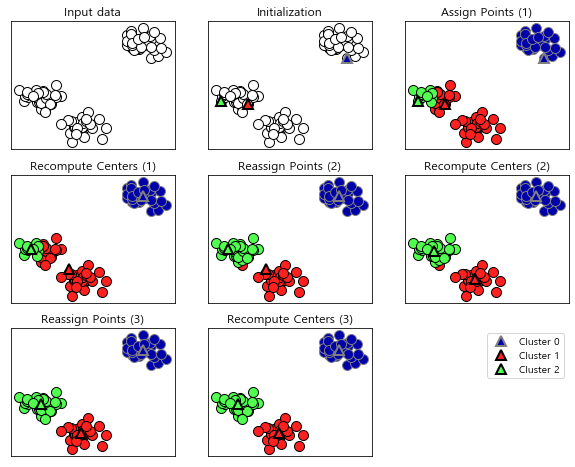

In [28]:
#  K-means 알고리즘 이해하기 
mglearn.plots.plot_kmeans_algorithm()
# 중심점의 위치가 중요! 
# 처음부터 중심점을 잘잡으면 반복 횟수가 줄어들어 효율 증가

In [29]:
# KMeans 모듈 임포트
from sklearn.cluster import KMeans

In [30]:
X, y = sklearn.datasets.make_blobs()

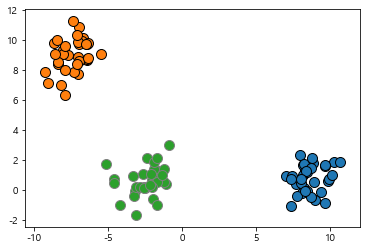

In [31]:
# 실제 정답
mglearn.discrete_scatter(X[:,0],X[:,1],y,markers="o")

In [32]:
# 비지도 학습이기 때문에 레이블을 넘겨주지 않는다.
# 그렇기 때문에 비지도 학습은 엄청난 데이터를 필요로 한다.
km = KMeans(n_clusters=3).fit(X)  

In [33]:
# 비지도 학습을 통해 얻은 레이블
lbl = km.labels_

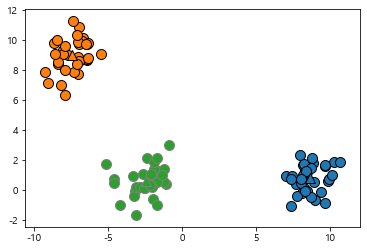

In [34]:
# 찾은 레이블과 실제 데이터를 그래프로 비교 
mglearn.discrete_scatter(X[:,0],X[:,1],lbl,markers="o")
# 각 군집의 중심점을 그래프에 표시
mglearn.discrete_scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
                         [0, 1, 2],markers="^")

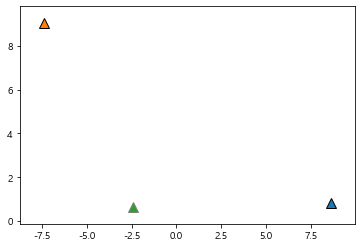

In [35]:
mglearn.discrete_scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
                         [0, 1, 2],markers="^")

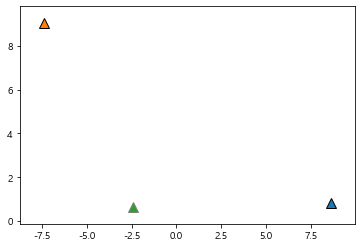

In [36]:
mglearn.discrete_scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
                         [0, 1, 2],markers="^")

In [37]:
KMeans().fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
# iris 샘플 
iris = sklearn.datasets.load_iris()

X = pd.DataFrame(iris.data,columns=["sepal_length","sepal_width",
                                    "petal_length","petal_width"])
y = pd.DataFrame(iris.target, columns=['target'])


Text(0.5, 1.0, '꽃잎')

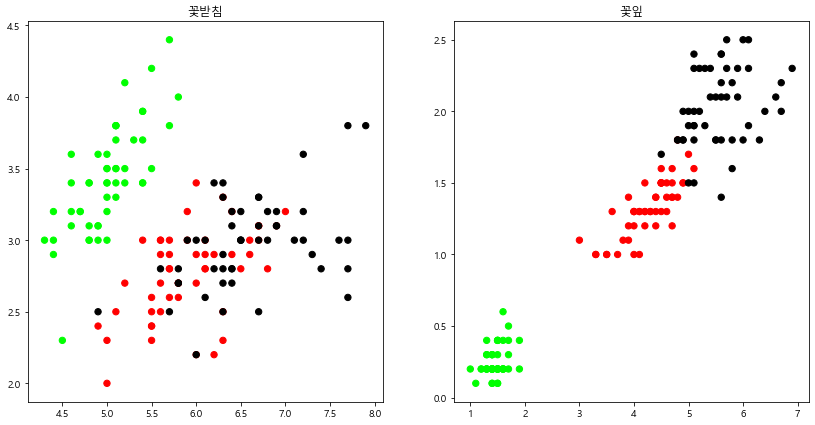

In [39]:
plt.figure(figsize=(14,7))
colormap = np.array(['lime','red','black'])

plt.subplot(1,2,1)
plt.scatter(X.sepal_length, X.sepal_width,c=colormap[y.target], s = 40)
plt.title("꽃받침")

plt.subplot(1,2,2)
plt.scatter(X.petal_length, X.petal_width,c=colormap[y.target], s = 40)
plt.title("꽃잎")

In [40]:
model = KMeans(n_clusters=3).fit(X)

In [41]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, '결과')

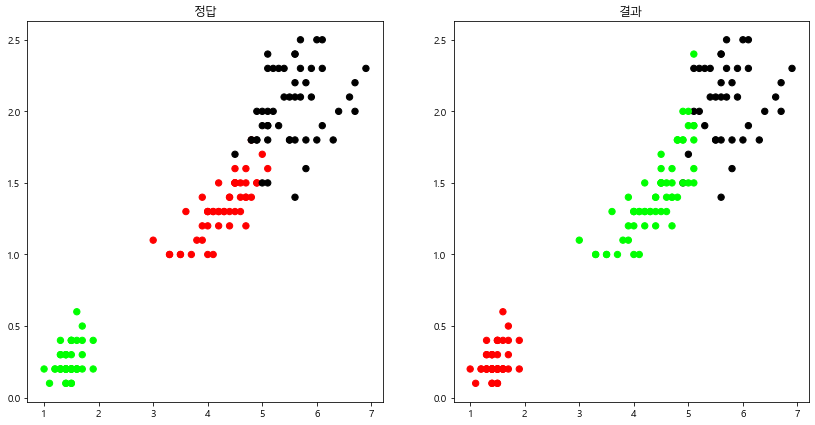

In [42]:
# 정답과 결과를 그래프로 비교 
plt.figure(figsize=(14,7))
colormap = np.array(['lime','red','black'])

plt.subplot(1,2,1)
plt.scatter(X.petal_length, X.petal_width,c=colormap[y.target], s = 40)
plt.title("정답")

plt.subplot(1,2,2)
plt.scatter(X.petal_length, X.petal_width,c=colormap[model.labels_], s = 40)
plt.title("결과")

In [43]:
accuracy_score(y,model.labels_)

0.24

In [44]:
# 수치로써 분석
from sklearn.metrics import confusion_matrix

confusion_matrix(y, model.labels_)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

In [45]:
# 예제 
# 사람의 키와 몸무게 
df = pd.DataFrame(columns=['height','weight'])
df.loc[0] = [185, 60]
df.loc[1] = [180, 60]
df.loc[2] = [185, 70]
df.loc[3] = [165, 63]
df.loc[4] = [155, 68]
df.loc[5] = [170, 75]
df.loc[6] = [175, 80]

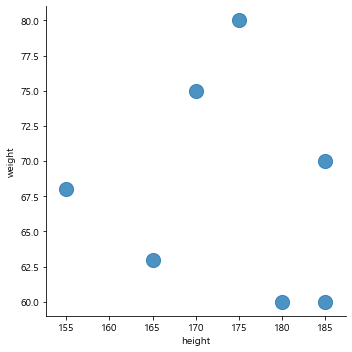

In [46]:
# 현재 데이터를 seaborn의 lmplot으로 
sns.lmplot('height','weight',data=df,fit_reg=False,scatter_kws={'s':200})

In [47]:
model = KMeans(n_clusters=3).fit(df.values)

In [48]:
df['label'] = model.labels_
df

,height,weight,label
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,0
4,155,68,0
5,170,75,2
6,175,80,2


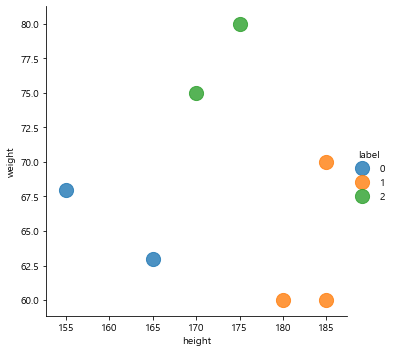

In [49]:
sns.lmplot('height','weight',data=df,fit_reg=False,scatter_kws={'s':200},hue='label')

#  사례 : 타이타닉을 이용한 알고리즘 성능 비교 
<hr/>

## 1. Collecting the data < 데이터 수집
    
    - https://www.kaggle.com/c/titanic/data

In [70]:
train = pd.read_csv('data/titanic/train.csv')
test = pd.read_csv('data/titanic/test.csv')

## 2. Exploratory Data Analysis   < 탐색적 데이터 분석

In [55]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
# 기본적인 통계 정보 
print(train.shape)
print(test.shape)
print(train.info())
print(test.info())

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null

In [60]:
'''
- Pclass
- Sex
- SibSp
- Parch
- Embarked
    C = Cherbourg, Q = Queenstown, S = Southampton
- Cabin
'''

def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

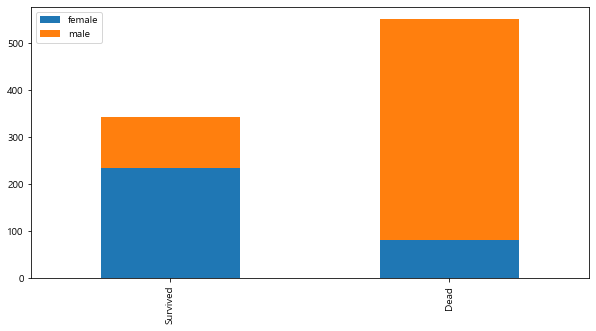

In [63]:
bar_chart('Sex') # 남자가 많이 죽었다 

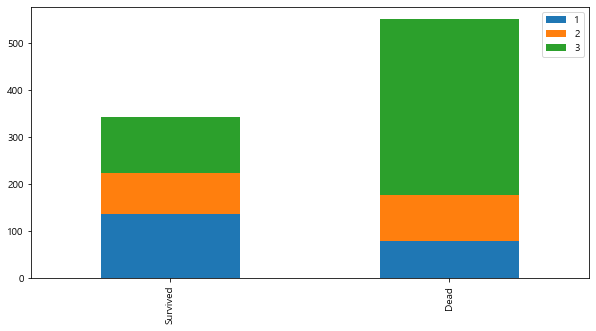

In [64]:
bar_chart('Pclass')  # 객실 등급도 충분히 생존여부에 영향을 미친다.

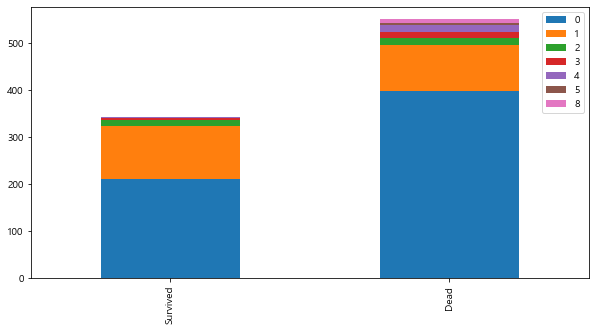

In [66]:
bar_chart('SibSp')  # 동승여부가 생존여부에 영향을 미친다.

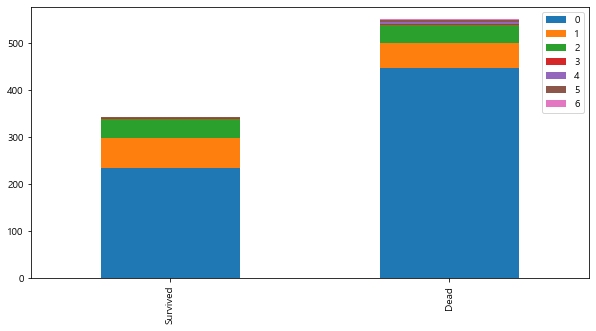

In [67]:
bar_chart('Parch')

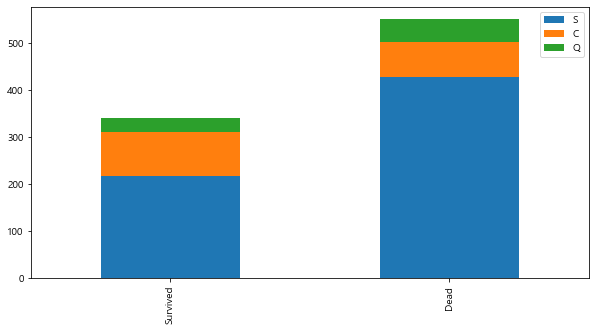

In [68]:
bar_chart('Embarked') # 연관은 있으나 개연성을 찾아야 한다 

<hr/>

## 3. Feature Engineering : 전처리 가공

<hr/>

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Name : Mr. Mrs, Miss를 추출

In [75]:
train_test_data = [train, test]

In [76]:
# 정규 표현식을 이용   <맨끝에 .이온다 
for dataset in train_test_data:
    dataset["Title"] = dataset['Name'].str.extract(' ([A-za-z]+)\.') 

In [77]:
print(train["Title"].value_counts())
print(test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Lady          1
Countess      1
Don           1
Ms            1
Jonkheer      1
Capt          1
Sir           1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64


In [78]:
title_mapping = {'Mr':0, 'Miss':1,'Mrs':2, 'Master':3, 'Dr':3, 'Rev' : 3,
                 'Col':3,'Major':3,'Mlle':3, 'Jonkheer':3,'Sir':3,'Mme':3,
                 'Capt':3,'Countess':3,'Lady':3, 'Ms':3, 'Don':3, 'Dona':3}

In [79]:
# mapping 적용 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


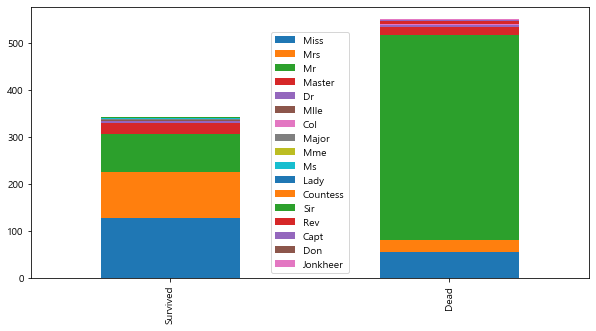

In [80]:
bar_chart("Title")

In [81]:
# 데이터 셋에서 불필요한 feature(Name) 삭제
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [82]:
# drop 적용 확인
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [83]:
for dataset in train_test_data:
    dataset['Sex']= dataset['Sex'].map({'male':0,'female':1})

In [84]:
# mapping 적용 확인
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,Mrs


# Age데이터의 binning

    child:0, young:1, adult: 2, mid-age:3, senior:4

In [85]:
# 결측치 확인 : 그냥 삭제하기엔 남은 데이터의 수가 부족함.
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [86]:
# 결측치 처리 : 남자들은 Mr의 평균나이, Mrs는 Mrs의 평균나이, Miss는 Miss의 평균나이
# 결측치를 각 Title에 대한 연령의 중간값 으로 채운다(Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

In [87]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [88]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <16, 'Age'] = 0
    dataset.loc[(dataset['Age'] >=16) & (dataset['Age']<26),'Age'] = 1
    dataset.loc[(dataset['Age'] >=26) & (dataset['Age']<36),'Age'] = 2
    dataset.loc[(dataset['Age'] >=36) & (dataset['Age']<62),'Age'] = 3
    dataset.loc[dataset['Age'] >=62 ,'Age'] = 4


# Embarked

In [89]:
# 결측치 확인 

train.isnull().sum()  # 2개 
test.isnull().sum()   # 0개 

PassengerId      0
Pclass           0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [90]:
# S가 월등히 많으므로 결측치는 S로 채우자
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [91]:
train['Embarked']=train['Embarked'].fillna('S')

In [92]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [93]:
for dataset in train_test_data:
    dataset['Embarked']= dataset['Embarked'].map({'S':0,"C":1,"Q":2})

In [94]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,Mr
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,Mrs
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,Mrs
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,Mr


# Fare

In [95]:
# test에 하나만 결측치  
train.isnull().sum()    #  0개
test.isnull().sum()     # 1개

PassengerId      0
Pclass           0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [96]:
#객실등급을 이용해서 결측치를 채움
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),
                    inplace=True)

In [97]:
test['Fare'].isnull().sum()

0

In [98]:
# Fare의 binning 
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17, "Fare"]=0
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare'] <= 30),"Fare"] = 1
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare'] <= 100),"Fare"] = 2
    dataset.loc[(dataset['Fare']>100),"Fare"]=3

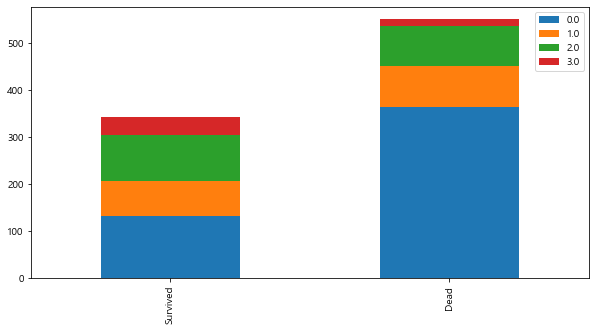

In [99]:
bar_chart('Fare')

### FamilySize : 동승자 컬럼 합치기

In [100]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [101]:
train['FamilySize'].value_counts()
test['FamilySize'].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

In [103]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [104]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,NaN,2,Mr,1
1,893,3,1,3.0,0.0,NaN,0,Mrs,2
2,894,2,0,4.0,0.0,NaN,2,Mr,1
3,895,3,0,2.0,0.0,NaN,0,Mr,1
4,896,3,1,1.0,0.0,NaN,0,Mrs,3


In [105]:
train_data = train.drop("Survived",axis=1)
target = train["Survived"]

In [106]:
print(train_data.shape,target.shape)

(891, 8) (891,)


## 지금까지의 전처리 파일로 저장

In [108]:
train_data.to_csv('data/titanic/train_data.csv',index=False)
target.to_csv('data/titanic/target.csv',index=False)